In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
data = pd.read_csv('clean_food_data.csv')

In [98]:
data.head()

,market,latitude,longitude,commodity,unit,price,year,month
0,Arusha (urban),-3.366667,36.683333,Maize,100 KG,38464.29,2006,1
1,Arusha (urban),-3.366667,36.683333,Rice,100 KG,63227.27,2006,1
2,Arusha (urban),-3.366667,36.683333,Beans,100 KG,80714.29,2006,1
3,Arusha (urban),-3.366667,36.683333,Maize,100 KG,34833.33,2006,2
4,Arusha (urban),-3.366667,36.683333,Rice,100 KG,72727.27,2006,2


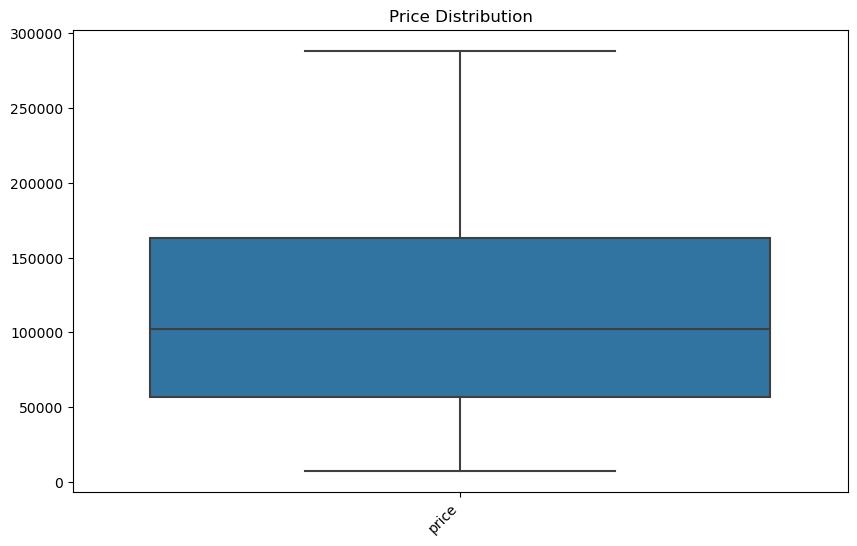

In [99]:
plt.figure(figsize=(10, 6))
sns.boxplot(data[['price']])
plt.title("Price Distribution")
plt.xticks(rotation=45, ha='right')
plt.show()

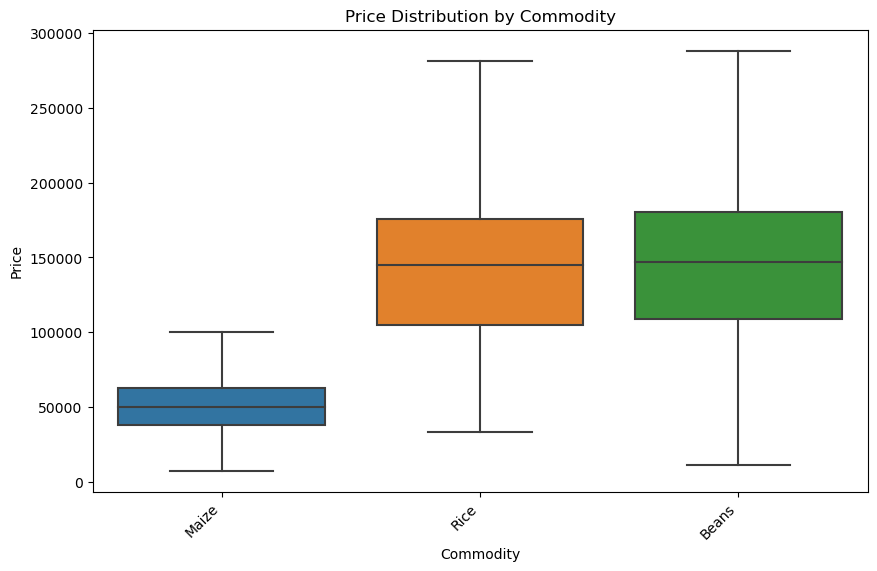

In [106]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="commodity", y="price")
plt.title("Price Distribution by Commodity")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Commodity")
plt.ylabel("Price")
plt.show()

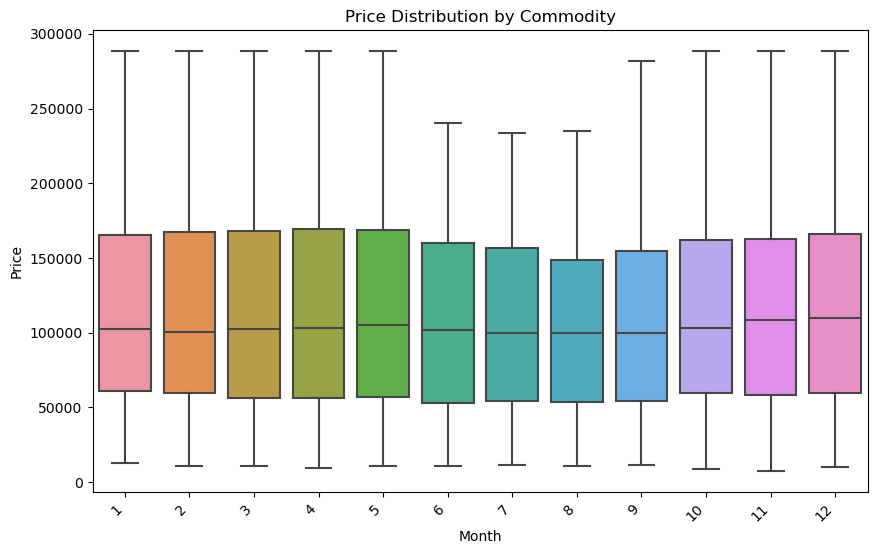

In [101]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="month", y="price")
plt.title("Price Distribution by Commodity")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Month")
plt.ylabel("Price")
plt.show()

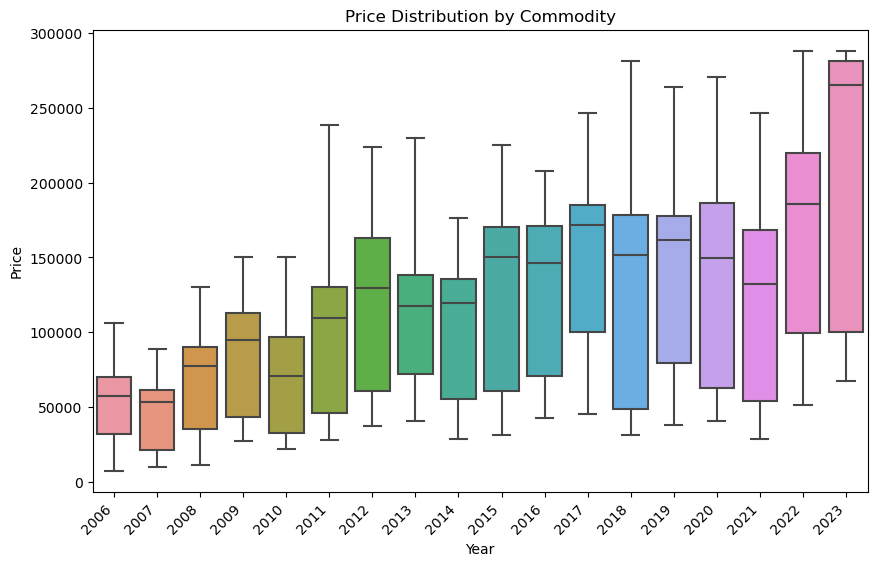

In [102]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="year", y="price")
plt.title("Price Distribution by Commodity")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

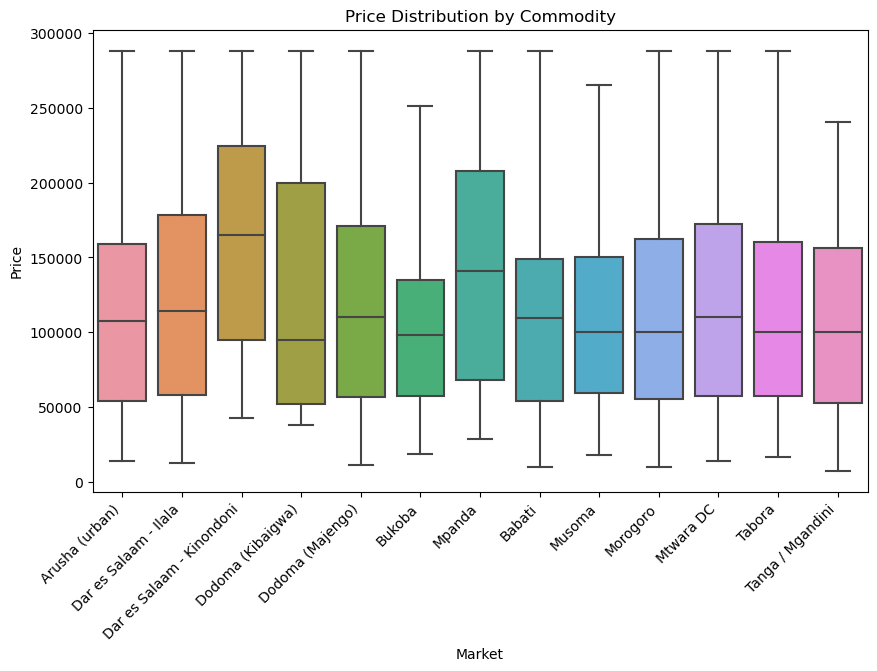

In [103]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="market", y="price")
plt.title("Price Distribution by Commodity")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Market")
plt.ylabel("Price")
plt.show()

In [104]:
def handle_outliers(data, column):
    Q3 = data[column].quantile(.75)
    Q1 = data[column].quantile(.25)
    IQR = Q3 -Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return lower_bound, upper_bound

In [105]:
beans_data = data[data['commodity'] == 'Beans']
lower, upper = handle_outliers(beans_data, 'price')
data.loc[((data['commodity'] == 'Beans') & (data['price'] < lower)), 'price'] = lower
data.loc[((data['commodity'] == 'Beans') & (data['price'] > upper)), 'price'] = upper

In [107]:
data = pd.get_dummies(data, prefix_sep='_', columns=['commodity', 'market'], dtype=int)

In [108]:
data

,latitude,longitude,unit,price,year,month,commodity_Beans,commodity_Maize,commodity_Rice,market_Arusha (urban),...,market_Dar es Salaam - Ilala,market_Dar es Salaam - Kinondoni,market_Dodoma (Kibaigwa),market_Dodoma (Majengo),market_Morogoro,market_Mpanda,market_Mtwara DC,market_Musoma,market_Tabora,market_Tanga / Mgandini
0,-3.366667,36.683333,100 KG,38464.29,2006,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,-3.366667,36.683333,100 KG,63227.27,2006,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,-3.366667,36.683333,100 KG,80714.29,2006,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,-3.366667,36.683333,100 KG,34833.33,2006,2,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,-3.366667,36.683333,100 KG,72727.27,2006,2,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5866,-5.073780,39.100106,100 KG,140000.00,2020,12,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
5867,-5.073780,39.100106,100 KG,206111.00,2020,12,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5868,-5.073780,39.100106,100 KG,60555.00,2021,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5869,-5.073780,39.100106,100 KG,143000.00,2021,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [109]:
column = ['latitude', 'longitude', 'unit']

columns = list(data.columns)
for col in column:
    columns.remove(col)

columns

['price',
 'year',
 'month',
 'commodity_Beans',
 'commodity_Maize',
 'commodity_Rice',
 'market_Arusha (urban)',
 'market_Babati',
 'market_Bukoba',
 'market_Dar es Salaam - Ilala',
 'market_Dar es Salaam - Kinondoni',
 'market_Dodoma (Kibaigwa)',
 'market_Dodoma (Majengo)',
 'market_Morogoro',
 'market_Mpanda',
 'market_Mtwara DC',
 'market_Musoma',
 'market_Tabora',
 'market_Tanga / Mgandini']

In [110]:
data = data[columns]
data

,price,year,month,commodity_Beans,commodity_Maize,commodity_Rice,market_Arusha (urban),market_Babati,market_Bukoba,market_Dar es Salaam - Ilala,market_Dar es Salaam - Kinondoni,market_Dodoma (Kibaigwa),market_Dodoma (Majengo),market_Morogoro,market_Mpanda,market_Mtwara DC,market_Musoma,market_Tabora,market_Tanga / Mgandini
0,38464.29,2006,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,63227.27,2006,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,80714.29,2006,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,34833.33,2006,2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,72727.27,2006,2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5866,140000.00,2020,12,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
5867,206111.00,2020,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5868,60555.00,2021,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5869,143000.00,2021,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


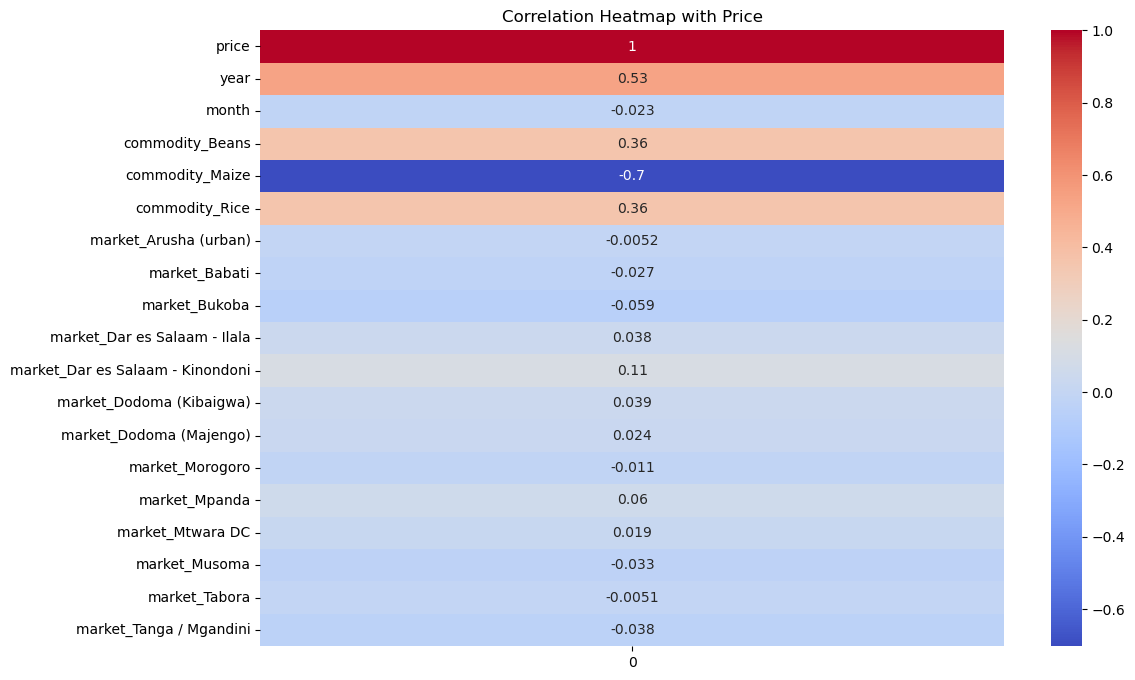

In [111]:
plt.figure(figsize=(12, 8)) 
correlation = data.corrwith(data['price'])
sns.heatmap(correlation.to_frame(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap with Price")
plt.show()